# 安徽安庆市项目`WRF-CMAQ`模拟分析
## Model Evaluation : `chem-obs data`

---
*@author: Evan*\
*@date: 2023-08-09*

In [1]:
import sys
sys.path.append('../../src/')
import ModelEvaLib as me
from namelist import *

import matplotlib.pyplot as plt

# silence the warning note
import warnings
warnings.filterwarnings("ignore")

In [2]:
var = 'O3'
varch = 'O3'

title = '$O_3$'
units = '$\mu$$g/$$m^3$'

## 安庆市全部

In [3]:
df, sim, obs = me.get_var(cmaqfile,var,shpall,obsall,varch)

Get the O3 in shape of (744, 138, 135)
Extract the data within the boundary ...
Finish
Get the O3 in shape of (744,)
data is ready


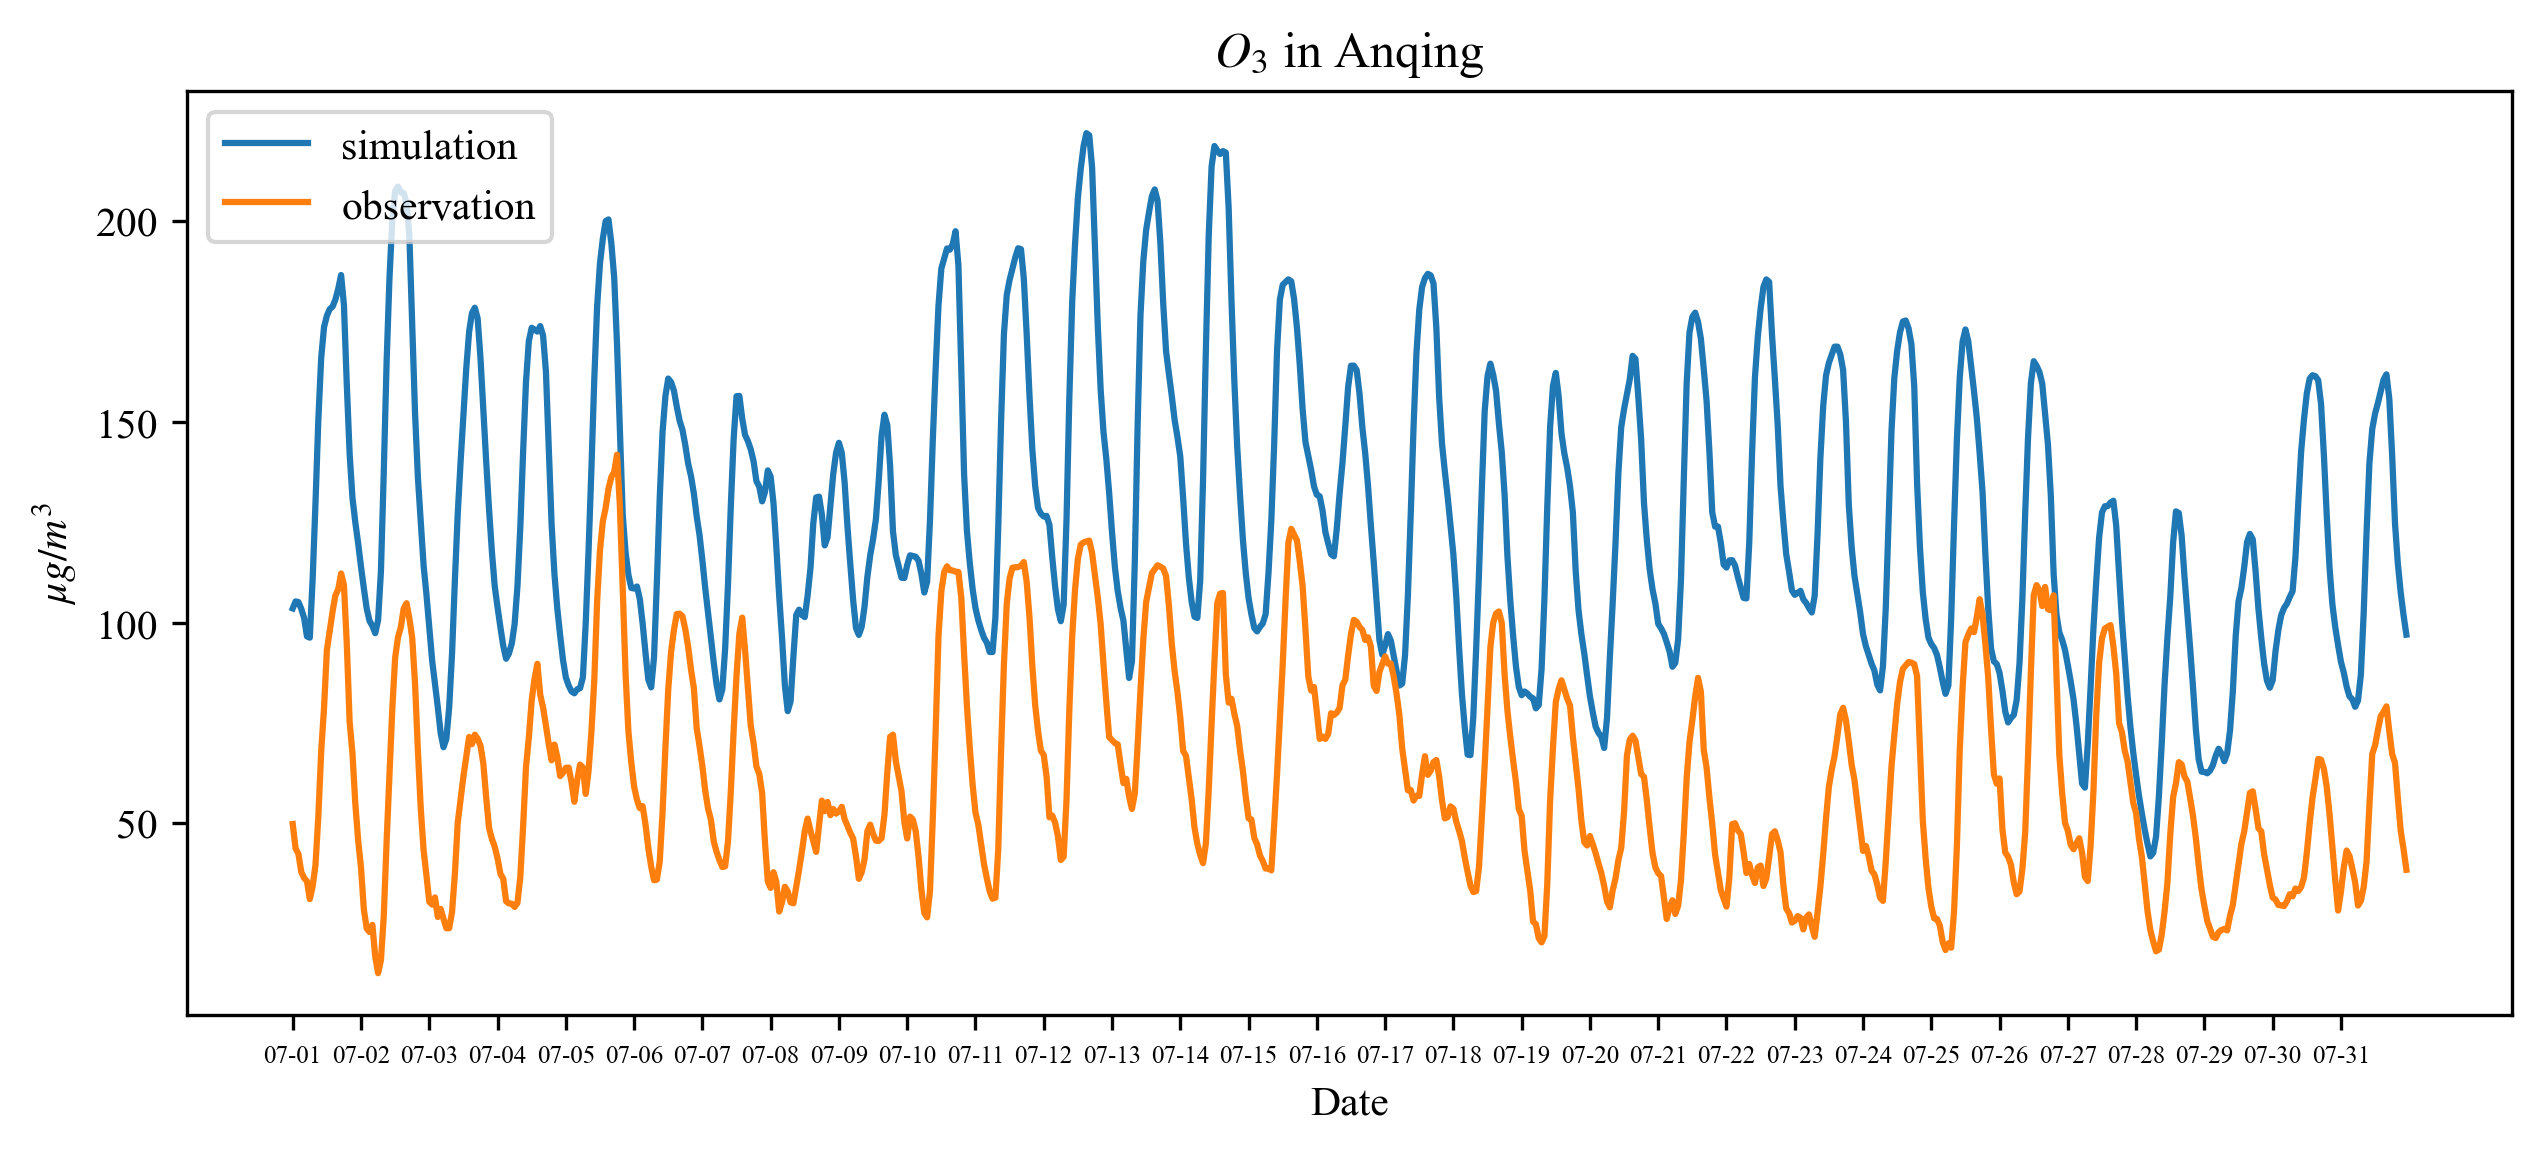

In [4]:
ax = me.linechart(sim, obs, timestart, timeend)

ax.legend(loc=2)
ax.set_title(f'{title} in Anqing')
ax.set_xlabel('Date')
ax.set_ylabel(units)
plt.show()

In [5]:
me.evaluation_frame(obs, sim, df)

,param,value
0,obs mean,61.237986
1,sim mean,126.861252
2,R,0.730911
3,MB,65.623266
4,RMSE,70.302981
5,IOA,0.484048


## 安庆市城区

In [6]:
df, sim, obs = me.get_var(cmaqfile,var,shpurban,obsurban,varch)


Get the O3 in shape of (744, 138, 135)
Extract the data within the boundary ...
Finish
Get the O3 in shape of (744,)
data is ready


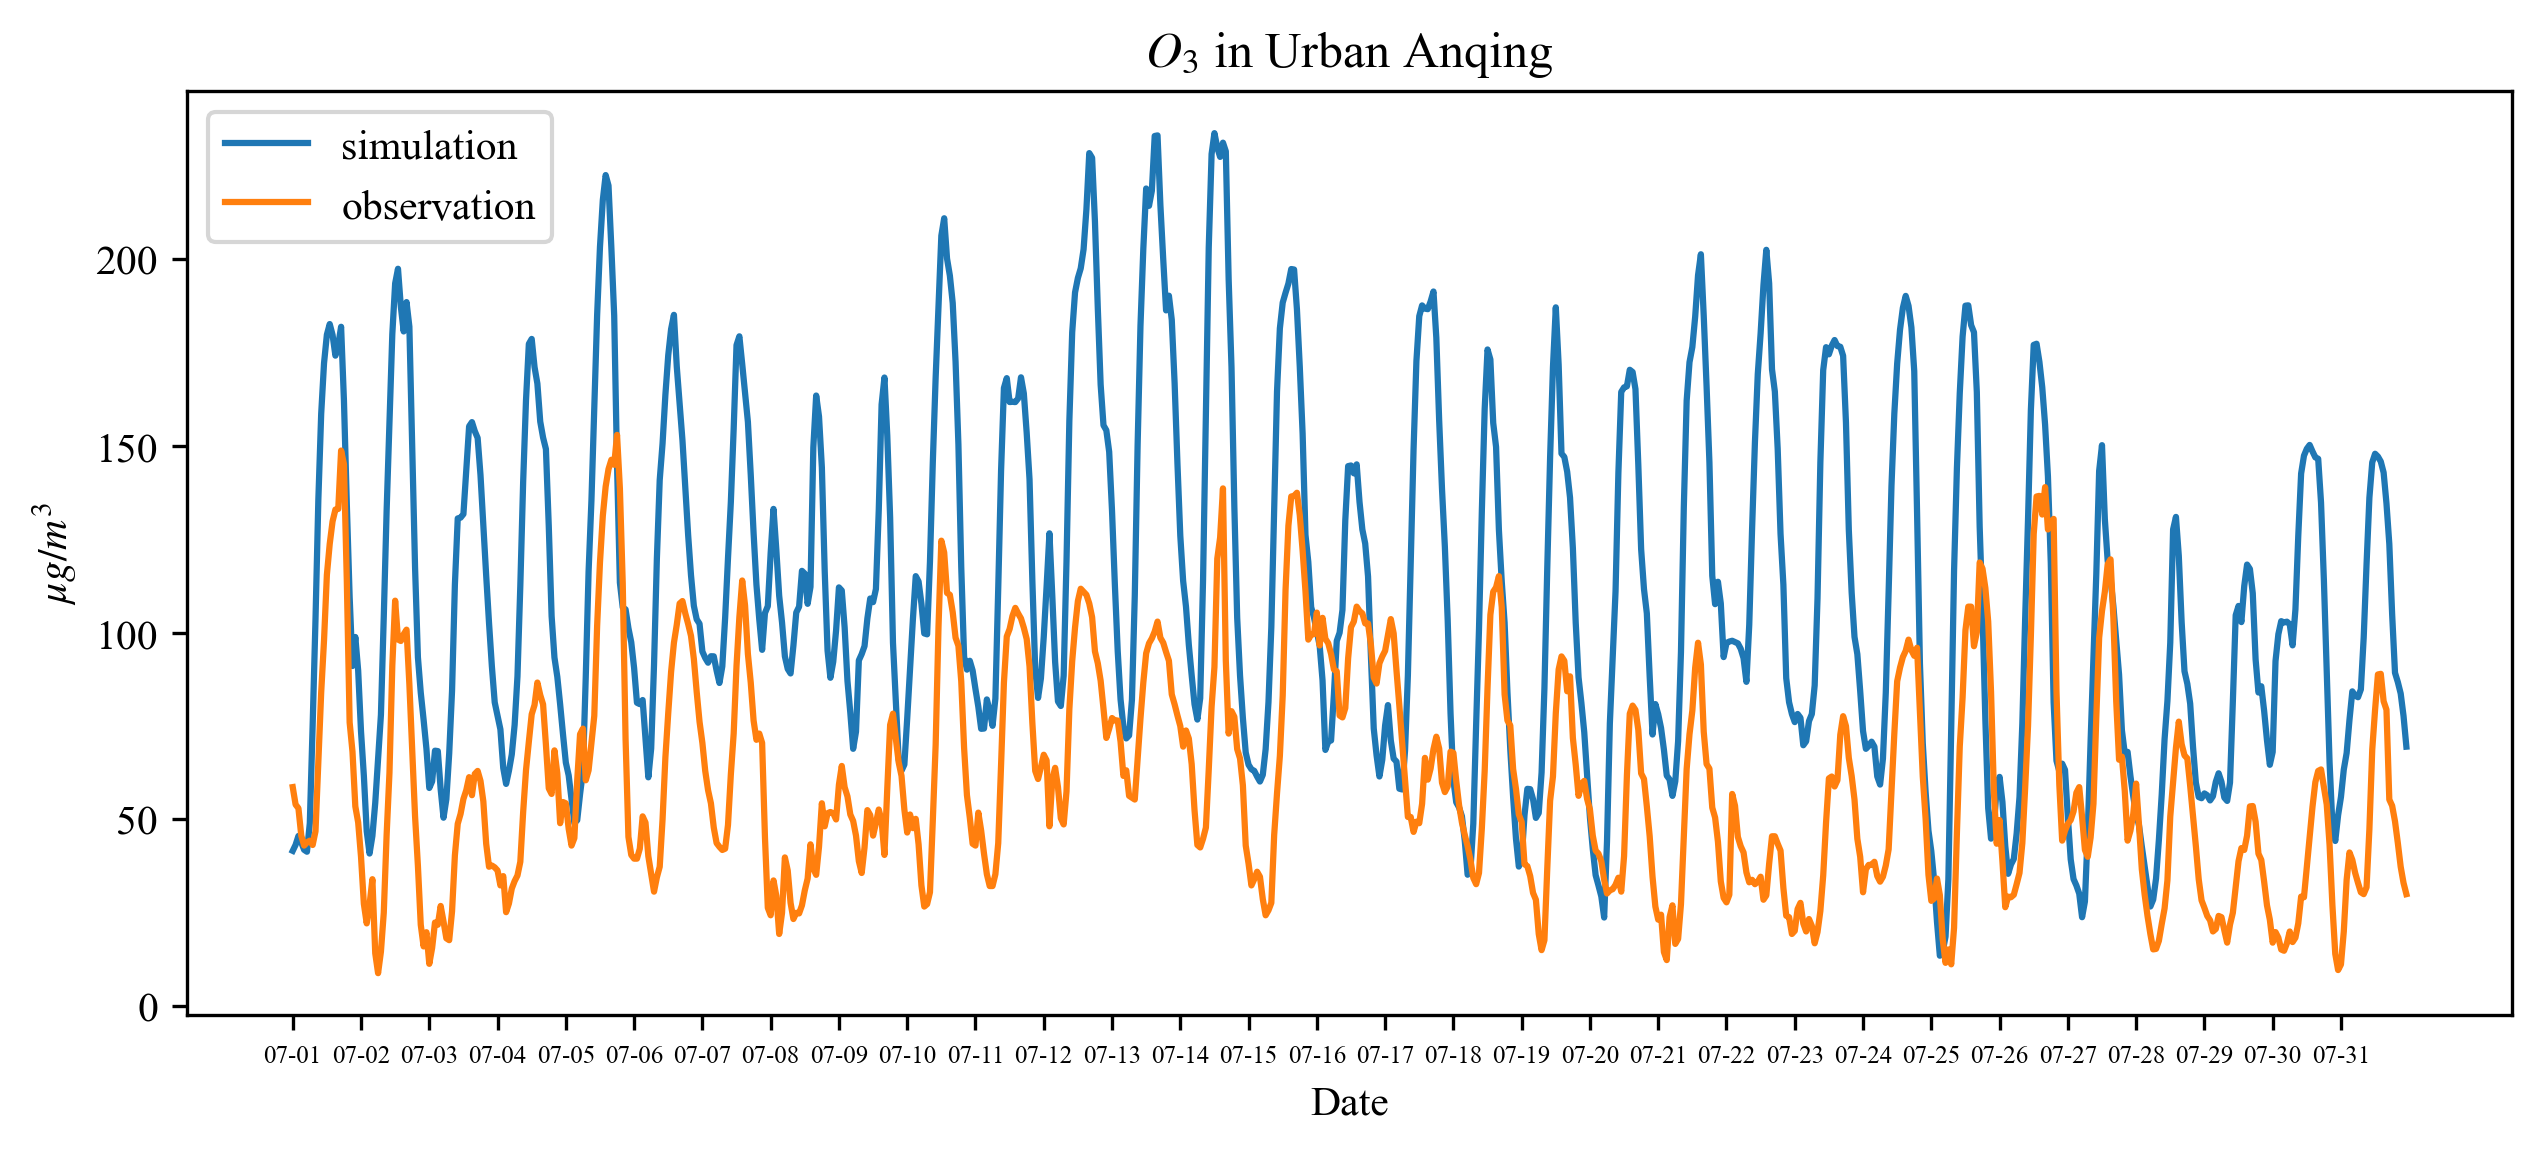

In [7]:
ax = me.linechart(sim, obs, timestart, timeend)

ax.legend(loc=2)
ax.set_title(f'{title} in Urban Anqing')
ax.set_xlabel('Date')
ax.set_ylabel(units)
plt.show()

In [8]:
me.evaluation_frame(obs, sim, df)

,param,value
0,obs mean,60.692518
1,sim mean,112.600113
2,R,0.629638
3,MB,51.907595
4,RMSE,64.297667
5,IOA,0.551236
